# **Data preprocessing and model creation.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageOps
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [ ]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42)


In [ ]:
X_train.shape

(51000, 28, 28, 1)

In [ ]:
model=Sequential([
    Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(X_train[0].shape[0],X_train[0].shape[1],1)),
    MaxPooling2D(pool_size=2),
    Conv2D(64,kernel_size=3,activation='relu',padding='same'),
    MaxPooling2D(pool_size=2),
    Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
    Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,170 (2.61 MB)

 Trainable params: 684,170 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 214s 133ms/step - accuracy: 0.8999 - loss: 0.2995 - val_accuracy: 0.9876 - val_loss: 0.0423
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 261s 132ms/step - accuracy: 0.9885 - loss: 0.0408 - val_accuracy: 0.9774 - val_loss: 0.0689
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 262s 132ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9896 - val_loss: 0.0369
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 263s 133ms/step - accuracy: 0.9945 - loss: 0.0194 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 263s 133ms/step - accuracy: 0.9940 - loss: 0.0166 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 271s 139ms/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 0.9908 - val_loss: 0.0393
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 252s 133ms/step - accuracy: 0.9957 - loss: 0.0126 - val_accuracy: 0.9891 - val_loss: 0.0471
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 261s 132ms/step - ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



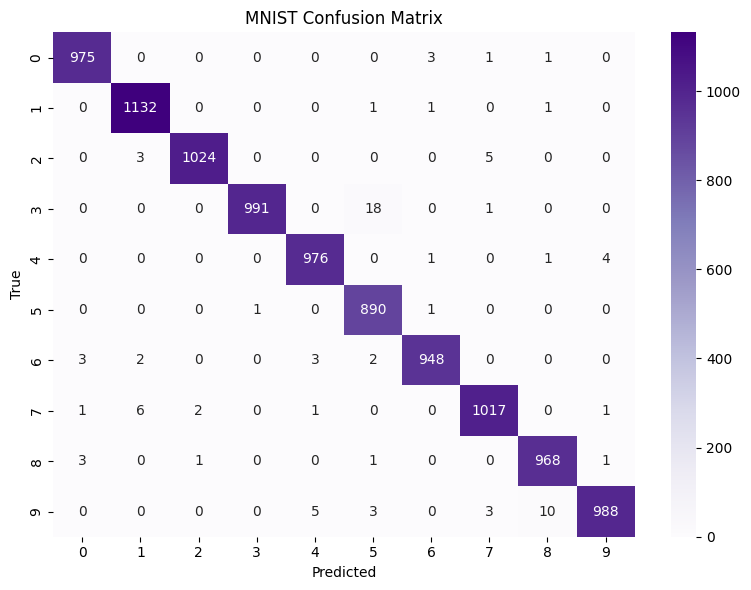

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("MNIST Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
model.save('mnist_model.keras')

# **User Interface creation.**

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageOps
import numpy as np
import tensorflow as tf


model = tf.keras.models.load_model("mnist_model.keras")

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img_arr = np.array(img) / 255.0
    img_arr = img_arr.reshape(1, 28, 28, 1)
    return img_arr, img

def predict_digit():
    file_path = filedialog.askopenfilename()
    if not file_path:
        return
    try:
        image_arr, display_img = preprocess_image(file_path)
        prediction = model.predict(image_arr)
        digit = np.argmax(prediction)
        confidence=np.max(prediction)
    except ExcepException as e:
        result_label.config(text=f"Error: {str(e)}",fg="red",font=("Arial",12))
        return
    result_label.config(text=f"Predicted Digit: {digit} ({confidence:.2%} confidence)", font=("Arial", 16), fg="green")
    img_tk = ImageTk.PhotoImage(display_img.resize((140, 140)))
    panel.config(image=img_tk)
    panel.image = img_tk



root = tk.Tk()
root.geometry("600x500")
root.title("MNIST Digit Classifier")

frame = tk.Frame(root)
frame.pack(pady=20)

btn = tk.Button(frame, text="Select Image", command=predict_digit, font=("Arial", 14))
btn.pack()

result_label = tk.Label(root, text="", font=("Arial", 16))
result_label.pack(pady=10)

panel = tk.Label(root)
panel.pack()

root.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
!pip freeze > requirements.txt